# Bipartite two level systems: $J$ operators expected values
The *Permutational Invariant Quantum Solver (PIQS)* is an open-source Python solver to study the exact Lindbladian dynamics of open quantum systems consisting of identical qubits. It is integrated in QuTiP and can be imported as a model.

This tutorial is meant to check whether for each point in time of the evolution of the system the expected values of J operators in PIQS is equivalent to QuTiP. In particular, the expected values are taken over the following 9 operators: $J_z^{(1/2)}$, $J_x^{(1/2)}$, $J_y^{(1/2)}$, $J_z^{(1)}+J_z^{(2)}$, $J_x^{(1)}+J_x^{(2)}$, and $J_y^{(1)}+J_y^{(2)}$. The notation $J_{z/x/y}^{(1)}=J^{(1)}_{z/x/y}\otimes \mathbb{1}^{(2)}$ and $J_{z/x/y}^{(2)}=\mathbb{1}^{(1)} \otimes J^{(2)}_{z/x/y}$ is used. 

In [1]:
%load_ext autotime
%load_ext autoreload
%autoreload 2

time: 17.8 ms


In [2]:
import initial_states as library

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from qutip import *
from qutip import piqs

time: 4.7 s


In [3]:
plt.rcParams["figure.figsize"] = (12,8)

time: 49.4 ms


### Compare Js expected values

In [4]:
N1 = 3
N2 = 3
nphot = 2

time: 50.7 ms


In [5]:
initial_piqs_1 = piqs.ground(N1, 'dicke')
initial_piqs_2 = piqs.excited(N2, 'dicke')

initial_qutip_1 = piqs.ground(N1, 'uncoupled')
initial_qutip_2 = piqs.excited(N2, 'uncoupled')

time: 111 ms


In [8]:
jopsq = np.array(library.two_species_qutip_expected(N1, N2, initial_qutip_1, initial_qutip_2, nphot))
jopsp = np.array(library.two_species_piqs_expected(N1, N2, initial_piqs_1, initial_piqs_2, nphot))

time: 11.7 s


In [9]:
t = np.linspace(0, 5, 1000)

jops_label = [r'$\langle J_{z}^{(1)}+J_{z}^{(2)}\rangle$',
              r'$\langle J_{x}^{(1)}+J_{x}^{(2)}\rangle$',
              r'$\langle J_{y}^{(1)}+J_{y}^{(2)}\rangle$',
              r'$\langle J_{z}^{(1)}\rangle$',r'$\langle J_{z}^{(2)}\rangle$',
              r'$\langle J_{x}^{(1)}\rangle$',r'$\langle J_{x}^{(2)}\rangle$',
              r'$\langle J_{y}^{(1)}\rangle$',r'$\langle J_{y}^{(2)}\rangle$']

jops_title = [r'$\langle J_{z}^{(1)}+J_{z}^{(2)}\rangle(t)$',
              r'$\langle J_{x}^{(1)}+J_{x}^{(2)}\rangle(t)$',
              r'$\langle J_{y}^{(1)}+J_{y}^{(2)}\rangle(t)$',
              r'$\langle J_{z}^{(1)}\rangle(t)$',r'$\langle J_{z}^{(2)}\rangle(t)$',
              r'$\langle J_{x}^{(1)}\rangle(t)$',r'$\langle J_{x}^{(2)}\rangle(t)$',
              r'$\langle J_{y}^{(1)}\rangle(t)$',r'$\langle J_{y}^{(2)}\rangle(t)$']

time: 27.7 ms


### Expected values plots

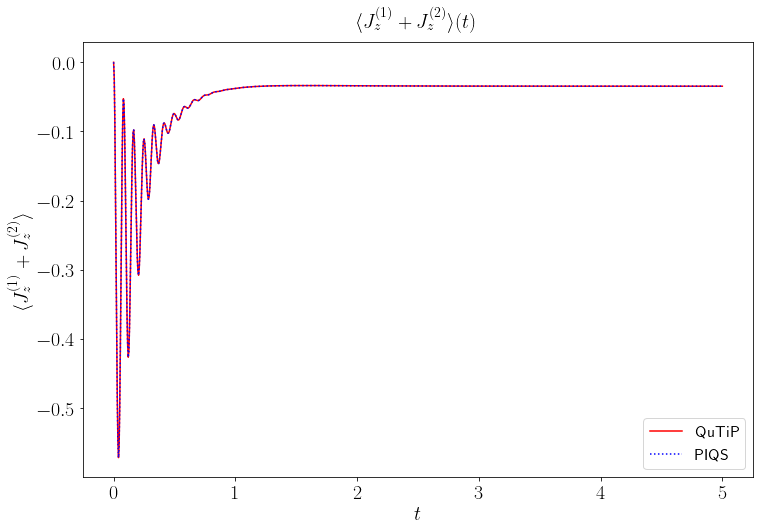

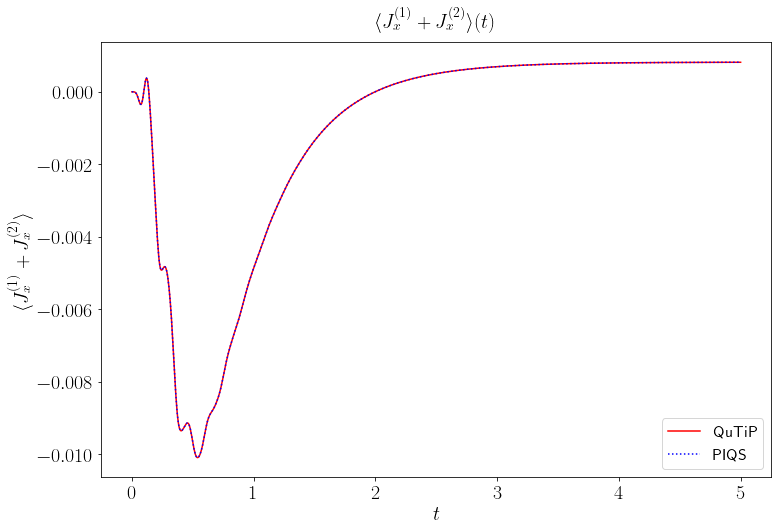

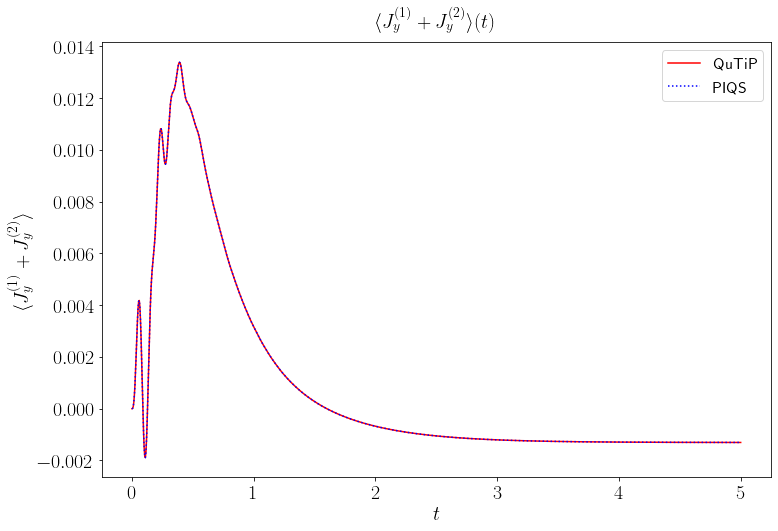

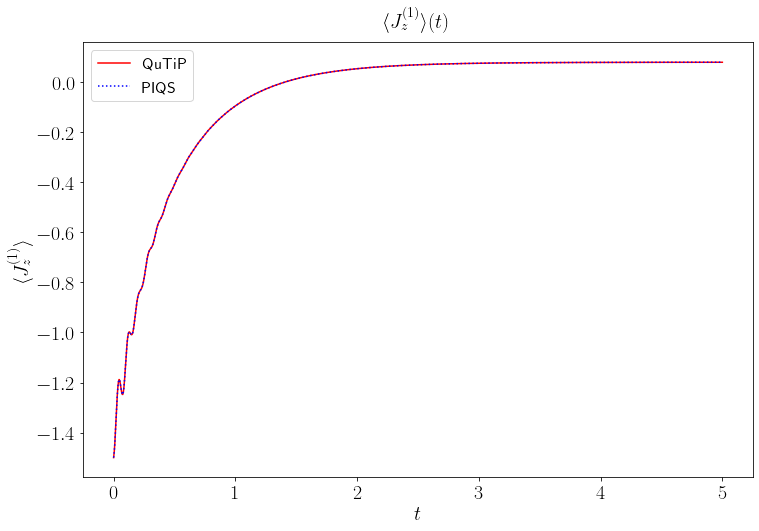

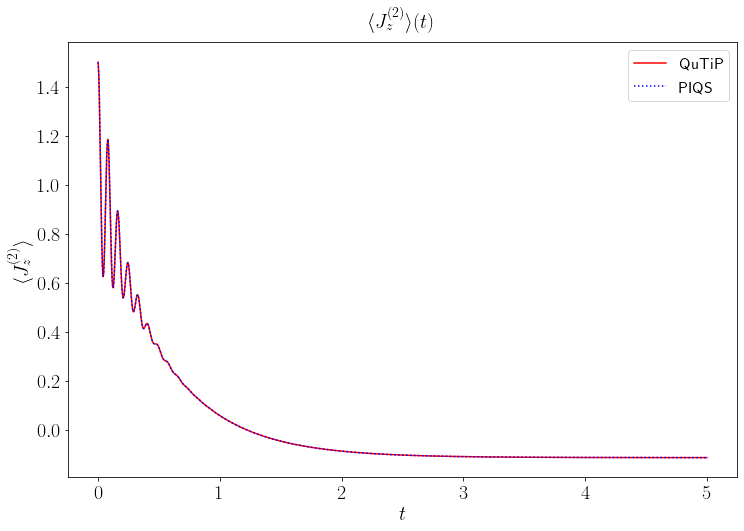

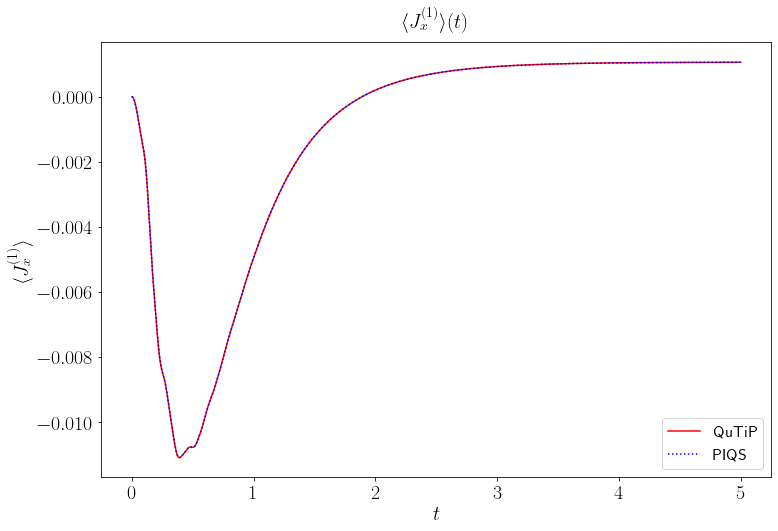

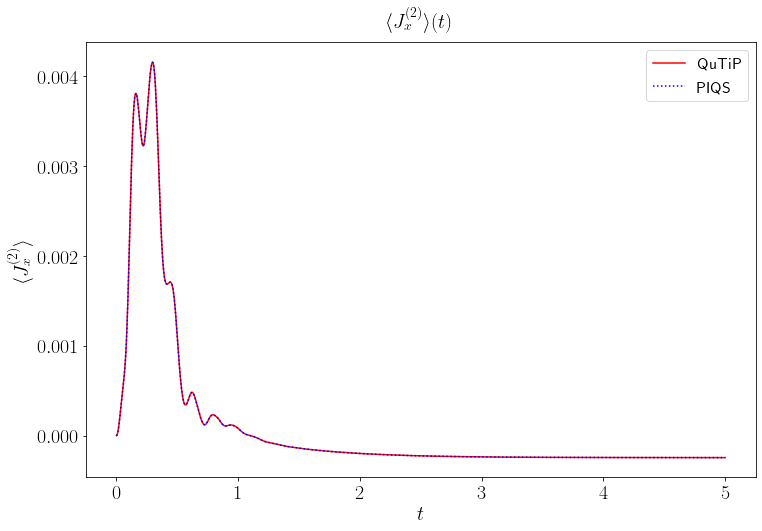

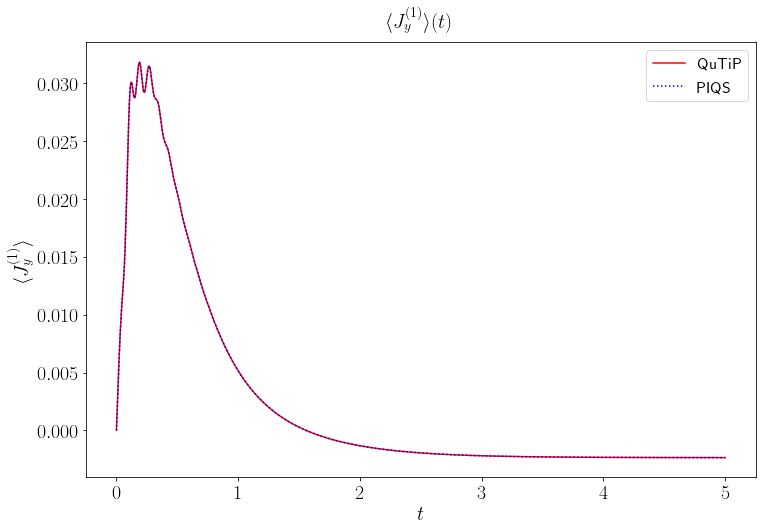

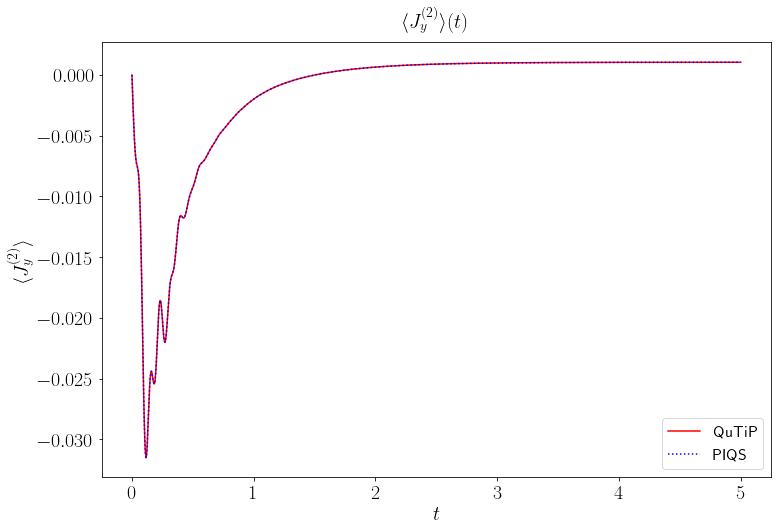

time: 5.76 s


In [10]:
jops = ['jz_1_jz_2','jx_1_jx_2','jy_1_jy_2','jz1_tot','jz2_tot','jx1_tot','jx2_tot','jy1_tot','jy2_tot']
for i in range(len(jops)):
    label_size = 20
    fig1 = plt.figure(1)
    plt.rc('text', usetex = True)
    plt.rc('xtick', labelsize=label_size)
    plt.rc('ytick', labelsize=label_size)
    plt.plot(t, jopsq[i], 'k-', color='r', label='QuTiP')
    plt.plot(t, jopsp[i], 'k:', color='b', label='PIQS')
    plt.title(jops_title[i], fontsize = label_size, pad=15)
    plt.xlabel(r'$t$', fontsize = label_size)
    plt.ylabel(jops_label[i], fontsize = label_size)
    plt.legend(fontsize = 0.8 * label_size)
    plt.show()
    plt.close()

### Relative difference plot

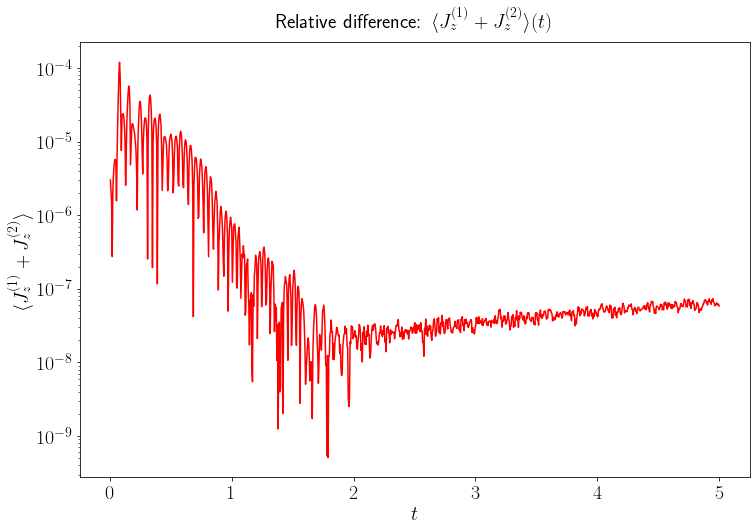

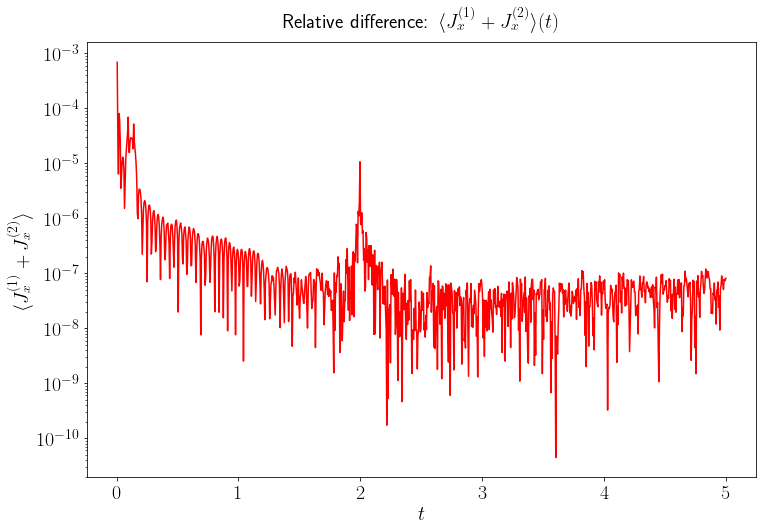

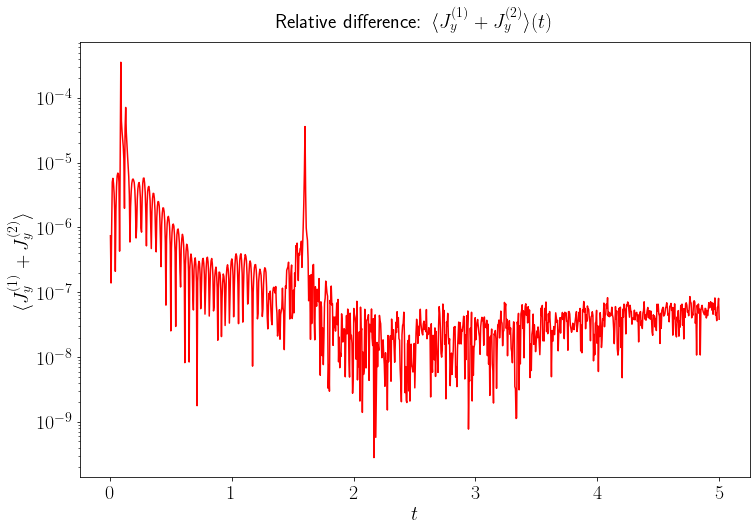

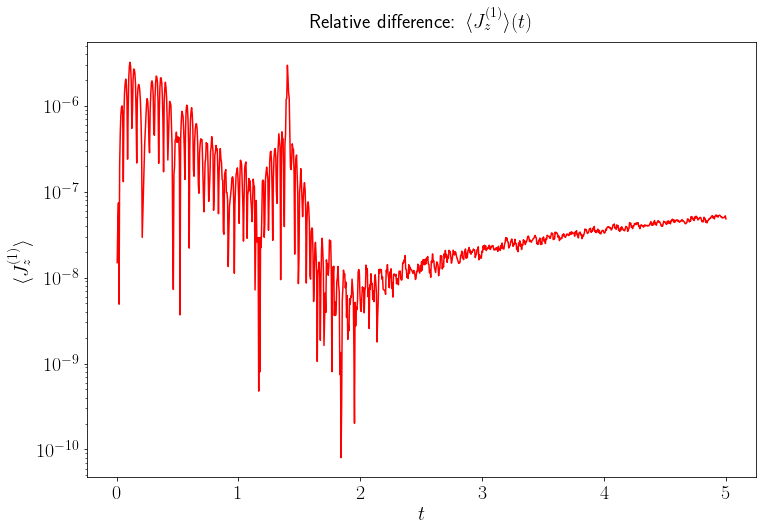

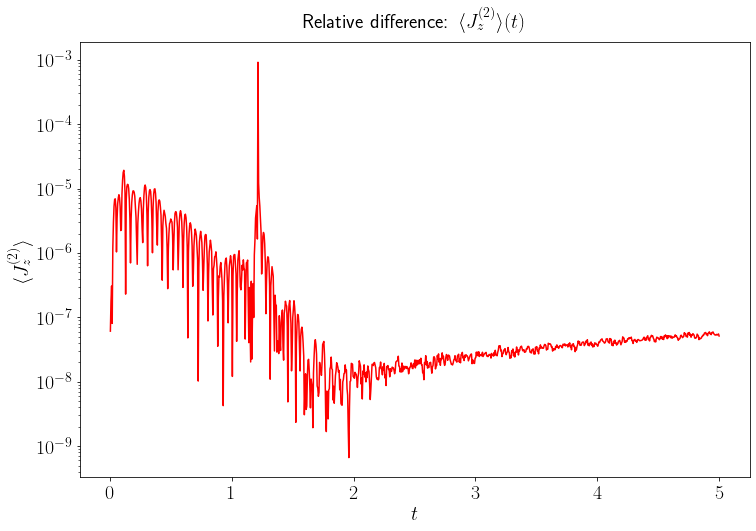

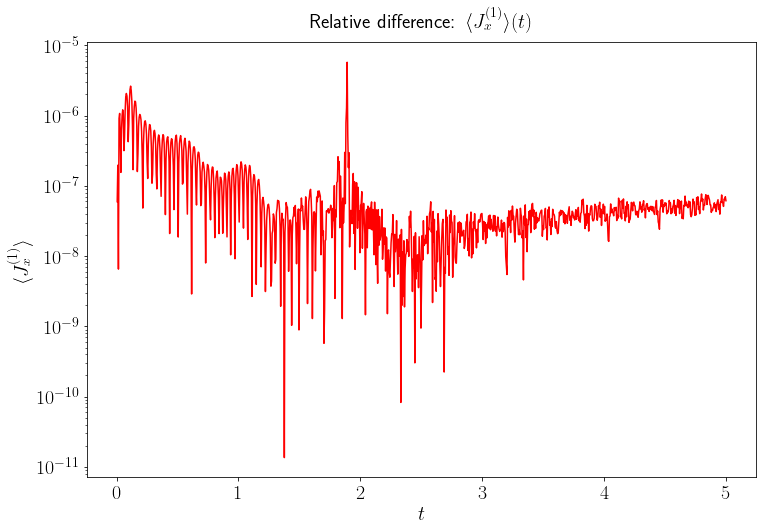

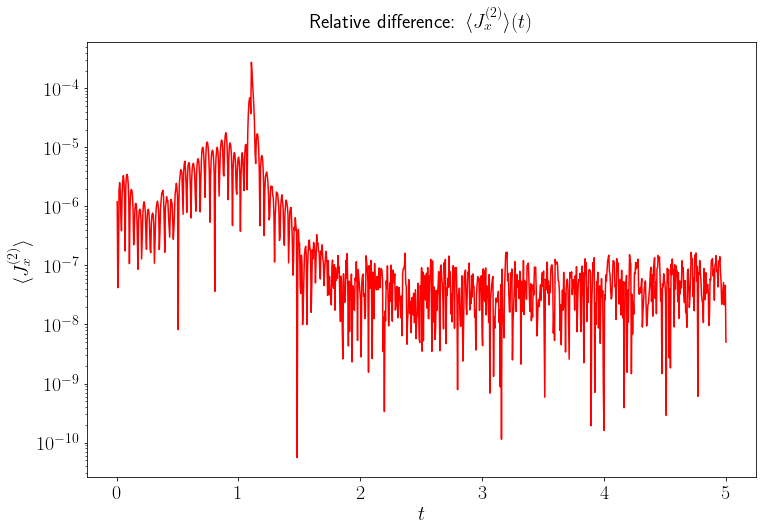

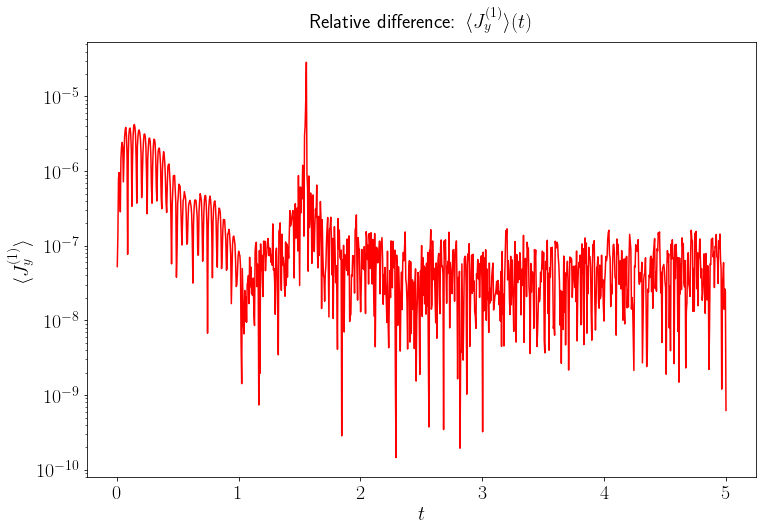

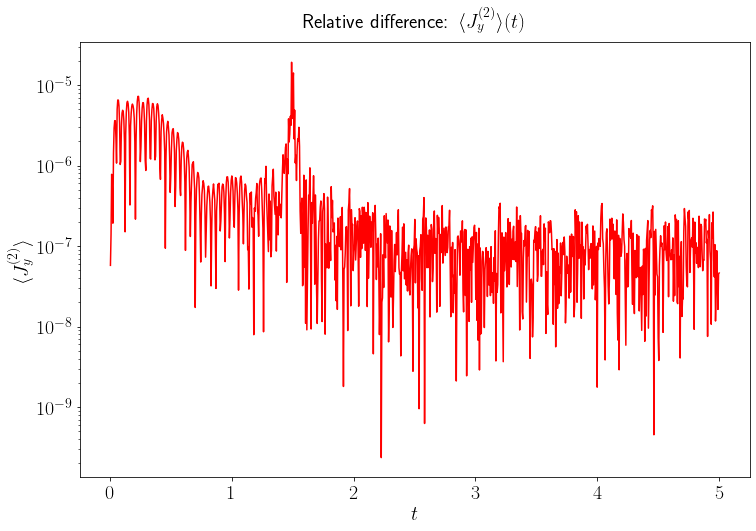

time: 11.4 s


In [19]:
jops = ['jz_1_jz_2','jx_1_jx_2','jy_1_jy_2','jz1_tot','jz2_tot','jx1_tot','jx2_tot','jy1_tot','jy2_tot']
for i in range(len(jops)):
    label_size = 20
    fig1 = plt.figure(1)
    plt.rc('text', usetex = True)
    plt.rc('xtick', labelsize=label_size)
    plt.rc('ytick', labelsize=label_size)
    plt.plot(t[1:], np.abs(jopsp[i,1:]-jopsq[i,1:])/np.abs(jopsq[i,1:]), 'k-', color='r')
    plt.yscale('log')
    plt.title('Relative difference: '+jops_title[i], fontsize = label_size, pad=15)
    plt.xlabel(r'$t$', fontsize = label_size)
    plt.ylabel(jops_label[i], fontsize = label_size)
    plt.show()
    plt.close()